# Pandas Tips & Tricks & More

### Hello Kaggler!
### <span style="color:PURPLE">Objective of this kernal is to demonstrate most commonly used</span> <span style="color:red">Pandas Tips & Tricks and More</span> .

# Contents

Note : Please use below links to navigate the note book

1. [Check Package Version](#CheckPackageVersion)
1. [Ignore Warnings](#IgnoreWarnings)
1. Pandas Basics
    1. [Data Read and Peak](#ReadandPeak)
    1. [Shape, Columns](#ShapeColumns)
    1. [pandas series to pandas dataframe](#series2df)
1. [Query Data Type](#QueryDataType)
1. [Columns With Missing Values as a List](#ColumnsWithMissingValues)
1. [Columns of object Data Type (Categorical Columns) as a List](#CatColumns)
1. [Columns that Contain Numeric Values as a List](#NumColumns)
1. [Categorical Columns with Cardinality less than N](#CatColsCar)
1. [Count of Unique Values in a Column](#UniqueCount)
1. [Select Columns Based on Data Types](#DTypeColSelect)
1. [Check whether data is ready for training](#checkDataBeforeTraining)
1. [Subplotting in Notebooks](#SublottinginNotebooks)
1. Tools to Deal with Missing Values
    1. [Get Missing Values Info](#GetMissingValuesInfo)
    1. [Fill missing values](#FillMissingValues)
    1. [Drop columns where data is missing more than x%](#dropDataMissingColumns)
    1. [Columns With Missing Values as a List](#ColumnsWithMissingValues)
1. Feature Engineering
    1. [Drop rows where target is missing](#dropTargetMissingRows)
    1. [OneHot Encode the Dataframe](#OneHotEncode)
    1. [Convert categorical columns in numerical dtype to object type](#Convertnumericalcategoricalobject)
    1. [Select Columns Based on Data Types](#DTypeColSelect)
    1. [Get feature columns df and target column from training data](#getTrainX_TrainY)
1. Modelling
    1. [Logistic Regression](#LogisticRegression)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pprint import pprint
print(os.listdir("../input"))

['titanic']


#### Check Package Version[^](#CheckPackageVersion)<a id="CheckPackageVersion" ></a><br>

In [2]:
print(pd.__version__)
print(np.__version__)

0.25.0
1.17.0


#### Ignore Warnings[^](#IgnoreWarnings)<a id="IgnoreWarnings" ></a><br>

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Data Read and Peak [^](#ReadandPeak)<a id="ReadandPeak" ></a><br>

In [4]:
# Read & peek top
data = pd.read_csv("../input/titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Reading with Index column & peek tail
data2 = pd.read_csv("../input/titanic/train.csv",index_col='PassengerId')
data2.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Shape, Columns[^](#ShapeColumns)<a id="ShapeColumns" ></a><br>

In [6]:
# Shape, Row Count, Column Count & Column Names
print('Shape of dataframe \t:', data.shape)
print('# of Rows \t\t:', data.shape[0])
print('# of Columns \t\t:', data.shape[1])
print('Columns in dataframe \t:', data.columns)

Shape of dataframe 	: (891, 12)
# of Rows 		: 891
# of Columns 		: 12
Columns in dataframe 	: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Query Data Type[^](#QueryDataType)<a id="QueryDataType" ></a><br>

In [7]:
values = {}
arr = []
print('values is a ' ,type(values))
type(arr)

values is a  <class 'dict'>


list

#### Columns With Missing Values as a List[^](#ColumnsWithMissingValues)<a id="ColumnsWithMissingValues" ></a><br>

In [8]:
def getColumnsWithMissingValuesList(df):
    return [col for col in df.columns if df[col].isnull().any()] 

getColumnsWithMissingValuesList(data)

['Age', 'Cabin', 'Embarked']

#### Columns of object Data Type (Categorical Columns) as a List[^](#CatColumns)<a id="CatColumns" ></a><br>

In [9]:
def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

cat_cols = getObjectColumnsList(data)
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

#### Columns that Contain Numeric Values as a List[^](#NumColumns)<a id="NumColumns" ></a><br>

In [10]:
def getNumericColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

num_cols = getNumericColumnsList(data)
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Categorical Columns with Cardinality less than N[^](#CatColsCar)<a id="CatColsCar" ></a><br>

In [11]:
def getLowCardinalityColumnsList(df,cardinality):
    return [cname for cname in df.columns if df[cname].nunique() < cardinality and df[cname].dtype == "object"]

LowCardinalityColumns = getLowCardinalityColumnsList(data,10)
LowCardinalityColumns

['Sex', 'Embarked']

#### Count of Unique Values in a Column[^](#UniqueCount)<a id="UniqueCount" ></a><br>

In [12]:
data['Embarked'].nunique()

3

#### OneHot Encode the Dataframe[^](#OneHotEncode)<a id="OneHotEncode" ></a><br>

In [13]:
def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

oneHotEncoded_df = PerformOneHotEncoding(data,getLowCardinalityColumnsList(data,10))
oneHotEncoded_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


#### Select Columns Based on Data Types[^](#DTypeColSelect)<a id="DTypeColSelect" ></a><br>

In [14]:
# select only int64 & float64 columns
numeric_data = data.select_dtypes(include=['int64','float64'])

# select only object columns
categorical_data = data.select_dtypes(include='object')

In [15]:
numeric_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [16]:
categorical_data.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


#### Get Missing Values Info[^](#GetMissingValuesInfo)<a id="GetMissingValuesInfo" ></a><br>

In [17]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percentage'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(data)

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


#### Fill missing values[^](#FillMissingValues)<a id="FillMissingValues" ></a><br>

In [18]:
# for Object columns fill using 'UNKOWN'
# for Numeric columns fill using median
def fillMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(data)
data.head()

NameError: name 'HandleMissingValues' is not defined

In [19]:
#check for NaN values
data.isnull().sum().sum()

866

#### Drop columns where data is missing more than x%[^](#dropDataMissingColumns)<a id="dropDataMissingColumns" ></a><br>

In [20]:
# pass the DataFrame and percentage
def dropDataMissingColumns(df,percentage):
    print("Dropping columns where more than {}% values are Missing..".format(percentage))
    nan_percentage = df.isnull().sum().sort_values(ascending=False) / df.shape[0]
    missing_val = nan_percentage[nan_percentage > 0]
    to_drop = missing_val[missing_val > percentage/100].index.values
    df.drop(to_drop, axis=1, inplace=True)

#### Drop rows where target is missing[^](#dropTargetMissingRows)<a id="dropTargetMissingRows" ></a><br>

In [21]:
def dropTargetMissingRows(df,target):
    print("Dropping Rows where Target is Missing..")
    df.dropna(axis=0, subset=[target], inplace=True)

Logistic Regression[^](#LogisticRegression)<a id="LogisticRegression" ></a><br>

In [22]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Accuracy : ',accuracy_score(y_test,y_pre))

#### pandas series to pandas dataframe[^](#series2df)<a id="series2df" ></a><br>

In [23]:
series = data['Fare']
d = {series.name : series}
df = pd.DataFrame(d) 
df.head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


#### Convert categorical columns in numerical dtype to object type[^](#Convertnumericalcategoricalobject)<a id="Convertnumericalcategoricalobject" ></a><br>

Sometimes categorical columns comes in numerical data types. This is the case for all most all ordinal columns. If not converted to 'category' descriptive statistic summary does not makes sense.

In [24]:
PassengerClass = data['Pclass'].astype('category')
PassengerClass.describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

#### Check whether data is ready for training[^](#checkDataBeforeTraining)<a id="checkDataBeforeTraining" ></a>

In [25]:
# checks whether df contatins null values or object columns
def checkDataBeforeTraining(df):
    if(df.isnull().sum().sum() != 0):
        print("Error : Null Values Exist in Data")
        return False;
    
    if(len([cname for cname in df.columns if df[cname].dtype == "object"])>0):
        print("Error : Object Columns Exist in Data")
        return False;
    
    print("Data is Ready for Training")
    return True;

#### Get feature columns df and target column from training data[^](#getTrainX_TrainY)<a id="getTrainX_TrainY" ></a>

In [26]:
def getTrainX_TrainY(train_df,target):
    trainY = train_df.loc[:,target]
    trainX = train_df.drop(target, axis=1)
    return trainX,trainY

#### Subplotting in Notebooks[^](#SublottinginNotebooks)<a id="SublottinginNotebooks" ></a>

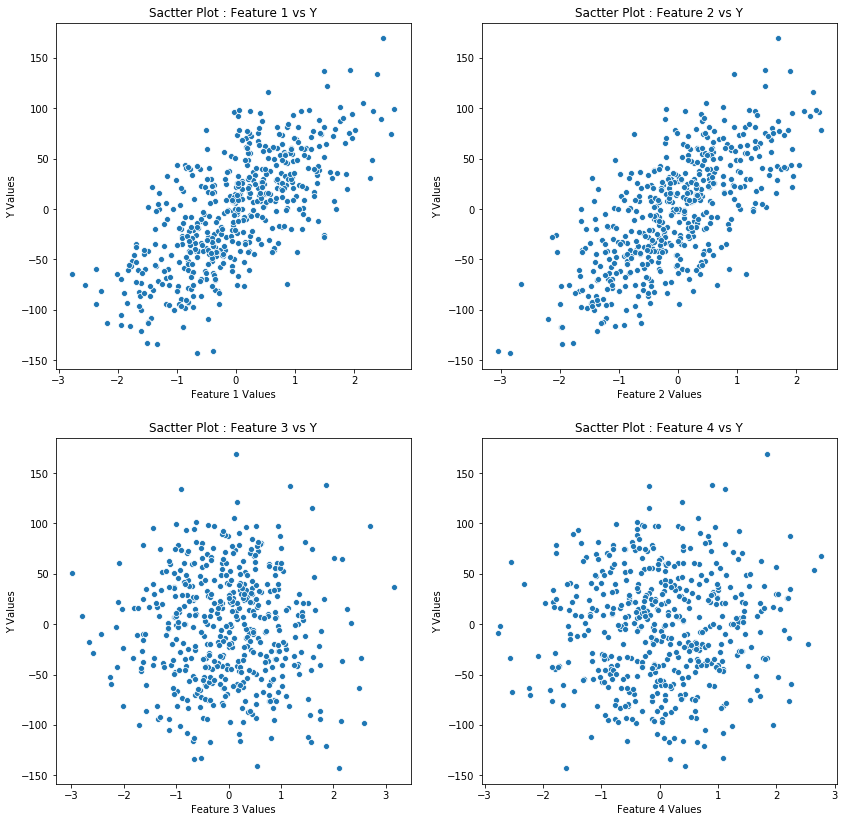

In [27]:
#impoting required libraries for demo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=4, n_informative=2,random_state=0, shuffle=False)


# Subploting lets 2*2 figure with sizes (14*14)
f,ax=plt.subplots(2,2,figsize=(14,14))

#first plot
sns.scatterplot(x=X[:,0], y=y, ax=ax[0,0])
ax[0,0].set_xlabel('Feature 1 Values')
ax[0,0].set_ylabel('Y Values')
ax[0,0].set_title('Sactter Plot : Feature 1 vs Y')

#second plot
sns.scatterplot(x=X[:,1], y=y,ax=ax[0,1])
ax[0,1].set_xlabel('Feature 2 Values')
ax[0,1].set_ylabel('Y Values')
ax[0,1].set_title('Sactter Plot : Feature 2 vs Y')

#Third plot
sns.scatterplot(x=X[:,2], y=y,ax=ax[1,0])
ax[1,0].set_xlabel('Feature 3 Values')
ax[1,0].set_ylabel('Y Values')
ax[1,0].set_title('Sactter Plot : Feature 3 vs Y')

#Fourth plot
sns.scatterplot(x=X[:,3], y=y,ax=ax[1,1])
ax[1,1].set_xlabel('Feature 4 Values')
ax[1,1].set_ylabel('Y Values')
ax[1,1].set_title('Sactter Plot : Feature 4 vs Y')

plt.show()